<a href="https://colab.research.google.com/github/UlisesNuB/Examen1/blob/main/last_mile_delibery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [4]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv("lastmile_delivery_operations_mit_lift_lab.csv")

In [ ]:
#Verificamos informacion de DataFrame
data.info()

In [6]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                         0
_title                                             6
_server_updated_at                                 0
_updated_by                                        0
_geometry                                          0
_latitude                                          0
_longitude                                         0
arrival_of_the_freight_vehicle                     0
plates                                             1
company_if_visible                                73
visit_purpose                                      0
type_of_vehicle                                    0
number_of_operators                                0
refrigerated_truck                                 0
type_of_cargo                                      0
picture_of_the_parked_freight_vehicle              0
departure_of_the_freight_vehicle                   0
where_was_the_vehicle_parked                       0
while_parked_was_the_engine_running           

In [13]:
#Se van a rellenar los espacios vacios de los siguientes string con texto, ya que esta información no la podemos inventar, ni promediar.
#Rellenar espacio de la compañia con que no se logro visualizar la compañia
data["company_if_visible"]=data["company_if_visible"].fillna("No se logro observar la compañia")

##Rellenar espacio del lugar con que no se proporciono la ubicaciñon
data["_title"]=data["_title"].fillna("No se proporciono la ubicación")

##Rellenar espacio de la placa del auto con que no se proporciono
data["plates"]=data["plates"].fillna("No se proporciono placa de auto")

In [14]:
#Rellenamos el valor de serving_customer con uno
data["serving_customer"]=data["serving_customer"].fillna(1)

In [ ]:
#Eliminamos columnas innecesarias, esta columana la borre, ya que no podemos datos si no observamos un accidente
data= data.drop(["describe_the_accident"], axis=1)
data

In [ ]:
#Eliminamos columnas innecesarias, esta columna la borre, ya que el numero del trafico 
data= data.drop(["maximum_number_of_vehicles_in_the_traffic_jam"], axis=1)
data

In [25]:
#Corroboramos valores nulos en cada fila
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
_geometry                                0
_latitude                                0
_longitude                               0
arrival_of_the_freight_vehicle           0
plates                                   0
company_if_visible                       0
visit_purpose                            0
type_of_vehicle                          0
number_of_operators                      0
refrigerated_truck                       0
type_of_cargo                            0
picture_of_the_parked_freight_vehicle    0
departure_of_the_freight_vehicle         0
where_was_the_vehicle_parked             0
while_parked_was_the_engine_running      0
used_traffic_cone                        0
vehicles_unloading_door                  0
number_of_available_trolleys             0
serving_customer                         0
garage_bloc

<Figure size 1080x576 with 0 Axes>

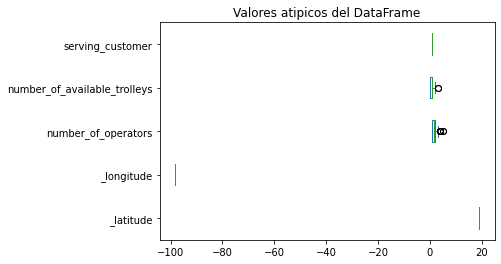

In [26]:
#Realizamos el diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15,8))
data.plot(kind="box", vert=False)
plt.title("Valores atipicos del DataFrame")
plt.show() #Dibujamos el diagrama

In [27]:
#Metodo aplicando desviacion estandar 
y=data
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido _latitude                       19.112587
_longitude                     -98.109219
number_of_operators              4.236537
number_of_available_trolleys     2.881871
serving_customer                 1.000000
dtype: float64
Limite inferior permitido _latitude                       18.967026
_longitude                     -98.361737
number_of_operators             -0.884889
number_of_available_trolleys    -1.530223
serving_customer                 1.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
#Encontramos Outliers del dataframe
data1= data[(y>Limite_Superior)|(y<Limite_Inferior)]
data1

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data2= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

In [31]:
#Eliminamos columnas innecesarias
data3=data.drop(['_record_id', '_title', '_server_updated_at', '_updated_by', '_geometry', 'arrival_of_the_freight_vehicle', 'plates', 'company_if_visible', 'visit_purpose', 'type_of_vehicle', 'refrigerated_truck', 'type_of_cargo', 'picture_of_the_parked_freight_vehicle','departure_of_the_freight_vehicle', 'where_was_the_vehicle_parked', 'while_parked_was_the_engine_running', 'used_traffic_cone', 'vehicles_unloading_door', 'garage_blocking', 'accident', 'noise', 'traffic_congestion' ], axis=1)
data3

,_latitude,_longitude,number_of_operators,number_of_available_trolleys,serving_customer
0,19.056893,-98.233489,1,1,1.0
1,19.056849,-98.233484,2,1,1.0
2,19.059677,-98.233916,1,0,1.0
3,19.062695,-98.228567,1,2,1.0
4,19.062724,-98.231397,2,2,1.0
...,...,...,...,...,...
177,19.043612,-98.194933,1,0,1.0
178,19.043607,-98.194856,1,0,1.0
179,19.043336,-98.194503,1,1,1.0
180,19.043576,-98.194873,2,0,1.0


In [37]:
#Unimos los dos archivos para generar uno limpio
strings=data[['_record_id', '_title', '_server_updated_at', '_updated_by', '_geometry', 'arrival_of_the_freight_vehicle', 'plates', 'company_if_visible', 'visit_purpose', 'type_of_vehicle', 'refrigerated_truck', 'type_of_cargo', 'picture_of_the_parked_freight_vehicle','departure_of_the_freight_vehicle', 'where_was_the_vehicle_parked', 'while_parked_was_the_engine_running', 'used_traffic_cone', 'vehicles_unloading_door', 'garage_blocking', 'accident', 'noise', 'traffic_congestion']]
Datos_limpios=pd.concat([strings, data], axis=1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,arrival_of_the_freight_vehicle,plates,company_if_visible,visit_purpose,type_of_vehicle,...,where_was_the_vehicle_parked,while_parked_was_the_engine_running,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,noise,traffic_congestion
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),14:00,KB-7050-A,Ricolino,Delivery,Light truck or Van,...,Street - next to the curbside,no,no,Side,1,1.0,yes,no,no,no
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),13:50,XC8687A,Marinela,Delivery,Heavy duty truck,...,Street - next to the curbside,no,no,Rear,1,1.0,no,no,no,no
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),11:47,SM 20745,La fete,Delivery,Pick-up,...,Street - next to the curbside,no,no,Side,0,1.0,no,no,no,no
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),11:45,SP35169,Barcel,Delivery,Light truck or Van,...,Street - next to the curbside,yes,no,Rear,2,1.0,yes,no,no,no
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),11:41,SN89460,No se logro observar la compañia,Delivery,Light truck or Van,...,Dedicated unloading area (Bay),no,no,Rear,2,1.0,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,f964004e-67a0-4b75-b2b0-ce04b9f0b344,No se proporciono la ubicación,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.194933077 19.043612116),10:36,HL-3785-F,No se logro observar la compañia,Delivery,Light truck or Van,...,Street - next to the curbside,no,no,Rear,0,1.0,no,no,no,no
178,5656a189-19f5-45a7-b53b-1a3db0de6571,No se proporciono la ubicación,2022-11-03 17:54:56 UTC,José Oropeza,SRID=4326;POINT(-98.1948560508 19.0436070826),10:33,SP-29-798,No se logro observar la compañia,Delivery,Light truck or Van,...,Street - next to the curbside,no,no,Side,0,1.0,no,no,no,no
179,bcbd462b-4c63-490b-bfec-0ef6657ead73,406-B Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:54:44 UTC,Emilio Garza,SRID=4326;POINT(-98.1945033093 19.043335537),11:19,05-AP-6G,Infra,Delivery,Light truck or Van,...,Street - next to the curbside,no,no,Rear,1,1.0,no,no,no,no
180,cd9ba76d-d899-4d87-9512-486aedb1b149,402E Avenida 2 Oriente\nPuebla PUE 72000\nMX,2022-11-03 17:14:09 UTC,Emilio Garza,SRID=4326;POINT(-98.1948728731 19.0435760418),11:03,LE-88-707,Alpura,Delivery,Pick-up,...,Street - next to the curbside,no,no,Rear,0,1.0,no,no,no,no


In [38]:
#Convertir dataframe a CSV
Datos_limpios.to_csv("Datos_limpios.csv")

In [39]:
#Descargar archivo filtrado en csv
from google.colab import files

files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>